This notebook executes the simulation

Data is stored using the python package named pickle

The last part is used to read the data and make the plot

In [1]:
import pickle
import numpy as np

In [2]:
from OverRotation import experiment_running

In [3]:
N = 500 # number of spins

'''
Here we are investigating the effect of inaccurate ancilla qubit control
So there are only log = int( np.ceil( np.log2(N)/2 ) ) rounds  phase estimation rounds, 
see the function preparation_attempt() in OverRotation.py

for N=500, log = 6
'''

Attempts = [1, 3, 5, 7, 9]
experiment_rounds = 30
for delta_t in [6]:
    # delta_t is the standard deviation of the time deviation for each controlled-rotation, 
    # It is in  nanoseconds, i.e.,  1e-9 s

    over_sigma = (5 * 1e6) * ( delta_t *1e-9 )
    # over_sigma  is standard deviation of the over rotation angle
    # Assuming the coupling strength is 5 MHz = 5e6 Hz
    
    
    fidelity, Std_fidelity = experiment_running(N, over_sigma, experiment_rounds, Attempts)


    dataforplotting = open('Data/N-{}-delta-{}.pkl'.format(N, delta_t), 'wb')
    pickle.dump(experiment_rounds, dataforplotting)
    pickle.dump(Attempts, dataforplotting)
    pickle.dump(fidelity, dataforplotting)
    pickle.dump(Std_fidelity, dataforplotting)
    dataforplotting.close()

In [4]:
import matplotlib.pyplot as plt

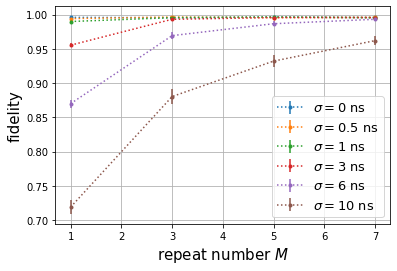

In [7]:
N = 500

plt.figure()
plt.grid()
plt.ylabel("fidelity", size = 15)
plt.xlabel(r'repeat number $M$', size = 15)
for delta_t in [0, 0.5, 1, 3, 6, 10]:

    dataforplotting = open('Data/N-{}-delta-{}.pkl'.format(N, delta_t), 'rb')
    experiment_rounds = pickle.load(dataforplotting)
    Attempts = pickle.load(dataforplotting) 
    # This is the repeat number M
    fidelity = pickle.load(dataforplotting)
    Std_fidelity = pickle.load(dataforplotting)
    dataforplotting.close()

    
    SE = [1.96 * i/np.sqrt(experiment_rounds)  for i in Std_fidelity]
    # Calculate the standard error as the 95% confidence interval

    plt.errorbar(Attempts, [i for i in fidelity], yerr = SE, linestyle=':',marker = '.', label=r"$\sigma = {}$ ns".format(delta_t))


plt.legend(  prop={'size':13})

plt.savefig("over_rotation_majorityvoting.pdf", dpi = 800, bbox_inches='tight',pad_inches=0.3)